## Sistemas	Inteligentes	para	a	Bioinformática 2022/2023
# Trabalho	prático – análise	de	dados usando aprendizagem máquina

## Initial data exploration and Preprocessing


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# para desenhar os gráficos dentro do notebook
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from scipy.stats import spearmanr
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline


### Variables
• seq_id: unique identifier of each protein variants
• protein_sequence: amino acid sequence of each protein variant. The stability (as measured by tm) of protein is determined by its protein sequence.
• pH: the scale used to specify the acidity of an aqueous solution under which the stability of protein was measured. Stability of the same protein can change at different pH levels.
• data_source: source where the data was published
• tm: target column. (Higher tm means the protein variant is more stable.)

In [5]:
#read the csv file into a dataframe
df_train = pd.read_csv(r"D:\git\dream_challenge_\novozymes-enzyme-stability-prediction\train.csv")
df_train

seq_id                                   protein_sequence   pH  \
0           0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1           1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2           2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3           3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4           4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   
...       ...                                                ...  ...   
31385   31385  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0   
31386   31386  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0   
31387   31387  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0   
31388   31388  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0   
31389   31389  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0   

                             data_source    tm  
0      doi.org/10.1038/s41592-020-0801-4  75.7  
1      doi.org/10.1038/s41592-020-0801-4  50.5  
2      doi.org/10.1038/s41592-020-0801-4  40.5  
3      doi.org/10.1038/s41592-020-0801-4  47.2  
4      doi.org/10.1038/s41592-020-0801-4  49.5  
...                                  ...   ...  
31385  doi.org/10.1038/s41592-020-0801-4  51.8  
31386  doi.org/10.1038/s41592-020-0801-4  37.2  
31387  doi.org/10.1038/s41592-020-0801-4  64.6  
31388  doi.org/10.1038/s41592-020-0801-4  50.7  
31389  doi.org/10.1038/s41592-020-0801-4  37.6  

[31390 rows x 5 columns]

In [6]:
train_updates = pd.read_csv(r'D:\git\dream_challenge_\novozymes-enzyme-stability-prediction\train_updates_20220929.csv')
train_updates

seq_id protein_sequence  pH  data_source  tm
0         69              NaN NaN          NaN NaN
1         70              NaN NaN          NaN NaN
2         71              NaN NaN          NaN NaN
3         72              NaN NaN          NaN NaN
4         73              NaN NaN          NaN NaN
...      ...              ...  ..          ...  ..
2429   30738              NaN NaN          NaN NaN
2430   30739              NaN NaN          NaN NaN
2431   30740              NaN NaN          NaN NaN
2432   30741              NaN NaN          NaN NaN
2433   30742              NaN NaN          NaN NaN

[2434 rows x 5 columns]

In [7]:
df_train.shape

(31390, 5)

In [8]:
#Removes all the values of the indexes included in the update
for seq_id in train_updates.seq_id:
    data = df_train.drop(index = seq_id)

In [9]:
df_train.shape

(31390, 5)

In [10]:
df_train.head()

seq_id                                   protein_sequence   pH  \
0       0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1       1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2       2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3       3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4       4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   

                         data_source    tm  
0  doi.org/10.1038/s41592-020-0801-4  75.7  
1  doi.org/10.1038/s41592-020-0801-4  50.5  
2  doi.org/10.1038/s41592-020-0801-4  40.5  
3  doi.org/10.1038/s41592-020-0801-4  47.2  
4  doi.org/10.1038/s41592-020-0801-4  49.5

### Summary

In [11]:
df_train.describe()

seq_id            pH            tm
count  31390.000000  31104.000000  31390.000000
mean   15694.500000      6.892339     49.147337
std     9061.656811      1.612225     14.010089
min        0.000000      1.990000     -1.000000
25%     7847.250000      7.000000     42.100000
50%    15694.500000      7.000000     48.000000
75%    23541.750000      7.000000     53.800000
max    31389.000000     64.900000    130.000000

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [13]:
df_train.isnull().sum()

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64

In [14]:
df_train.columns

Index(['seq_id', 'protein_sequence', 'pH', 'data_source', 'tm'], dtype='object')

### Preprocessing

In [15]:
df_train=df_train[df_train['pH']<14]

In [16]:
df_train=df_train.dropna()

In [17]:
df_train.shape

(27769, 5)

In [18]:
# New variable that represents how many times the aminoacid is present in the protein sequence
aminos = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for letter in aminos:
    df_train[letter] = df_train.protein_sequence.str.count(letter)

### Data Visualisation

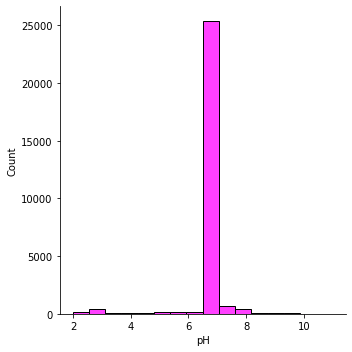

In [19]:
sns.displot(data=df_train,x='pH', color="magenta")
plt.xlabel("pH")
plt.show()

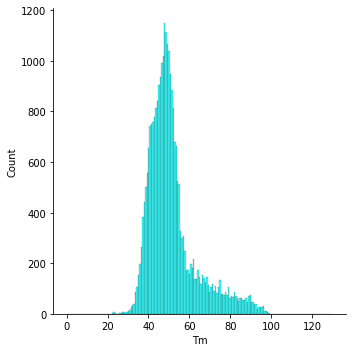

In [20]:
sns.displot(data=df_train,x='tm', color="cyan")
plt.xlabel("Tm")
plt.show()

## Feature extraction

In [21]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [22]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
df_train["stability_analysis"] = df_train["protein_sequence"].apply(lambda x: ProteinAnalysis(x).instability_index())
df_train["aromaticity_analysis"] = df_train["protein_sequence"].apply(lambda x: ProteinAnalysis(x).aromaticity())
df_train["isoelectric_analysis"] = df_train["protein_sequence"].apply(lambda x: ProteinAnalysis(x).isoelectric_point())
df_train["charge_analysis"] = df_train["protein_sequence"].apply(lambda x: ProteinAnalysis(x).charge_at_pH(8.0))
df_train["helix_analysis"] = df_train["protein_sequence"].apply(lambda x: ProteinAnalysis(x).secondary_structure_fraction()[0])
df_train["turn_analysis"] = df_train["protein_sequence"].apply(lambda x: ProteinAnalysis(x).secondary_structure_fraction()[1])
df_train["sheet_analysis"] = df_train["protein_sequence"].apply(lambda x: ProteinAnalysis(x).secondary_structure_fraction()[2])
df_train["mec_analysis_1"] = df_train["protein_sequence"].apply(lambda x: ProteinAnalysis(x).molar_extinction_coefficient()[0])
df_train["mec_analysis_2"] = df_train["protein_sequence"].apply(lambda x: ProteinAnalysis(x).molar_extinction_coefficient()[1])
df_train["gravy_analysis"] = df_train["protein_sequence"].apply(lambda x: ProteinAnalysis(x).gravy())
df_train

seq_id                                   protein_sequence   pH  \
0           0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1           1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2           2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3           3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4           4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   
...       ...                                                ...  ...   
31385   31385  YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...  7.0   
31386   31386  YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...  7.0   
31387   31387  YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...  7.0   
31388   31388  YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...  7.0   
31389   31389  YYVPDEYWQSLEVAHKLTFGYGYLTWEWVQGIRSYVYPLLIAGLYK...  7.0   

                             data_source    tm   A   C   D   E   F  ...  \
0      doi.org/10.1038/s41592-020-0801-4  75.7  45   1  13  30  13  ...   
1      doi.org/10.1038/s41592-020-0801-4  50.5  28   0  10  52   6  ...   
2      doi.org/10.1038/s41592-020-0801-4  40.5  50   9  27  32  21  ...   
3      doi.org/10.1038/s41592-020-0801-4  47.2  20   5  19  29  12  ...   
4      doi.org/10.1038/s41592-020-0801-4  49.5  86  14  78  78  32  ...   
...                                  ...   ...  ..  ..  ..  ..  ..  ...   
31385  doi.org/10.1038/s41592-020-0801-4  51.8  33  12  38  31  18  ...   
31386  doi.org/10.1038/s41592-020-0801-4  37.2  37   5  21  29  22  ...   
31387  doi.org/10.1038/s41592-020-0801-4  64.6  13   1   7   7   7  ...   
31388  doi.org/10.1038/s41592-020-0801-4  50.7  47   5  34  36  23  ...   
31389  doi.org/10.1038/s41592-020-0801-4  37.6  34   5  15  32  26  ...   

       stability_analysis  aromaticity_analysis  isoelectric_analysis  \
0               28.389736              0.058651              6.109589   
1               65.108392              0.041958              5.144349   
2               35.089336              0.080483              9.032101   
3               50.502264              0.071698              4.683840   
4               45.668808              0.065472              5.917928   
...                   ...                   ...                   ...   
31385           48.604026              0.089253              8.466327   
31386           35.285096              0.087420              6.532244   
31387           44.198437              0.117188              5.271214   
31388           36.618398              0.074199              5.688128   
31389           43.210838              0.135940              7.139853   

       charge_analysis  helix_analysis  turn_analysis  sheet_analysis  \
0            -2.963121        0.316716       0.211144        0.351906   
1           -13.887093        0.213287       0.160839        0.367133   
2             9.030381        0.209256       0.267606        0.213280   
3           -22.306830        0.267925       0.215094        0.298113   
4           -27.728413        0.271537       0.292901        0.206065   
...                ...             ...            ...             ...   
31385         2.805022        0.287796       0.242259        0.224044   
31386        -6.334752        0.324094       0.217484        0.270789   
31387        -3.948056        0.265625       0.250000        0.257812   
31388       -11.623496        0.288364       0.268128        0.259696   
31389        -2.473053        0.411546       0.202980        0.283054   

       mec_analysis_1  mec_analysis_2  gravy_analysis  
0               26470           26470        0.148094  
1               20970           20970       -1.089510  
2               40340           40840       -0.710463  
3               22460           22710       -0.507925  
4              158030          158905       -0.400896  
...               ...             ...             ...  
31385           98320           99070       -0.538434  
31386           48360      

C:\Users\maryg\AppData\Local\Temp\ipykernel_19800\1092095567.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr())


<AxesSubplot: >

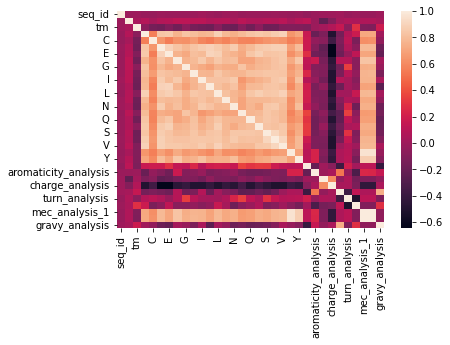

In [23]:
sns.heatmap(df_train.corr())

In [24]:
df_train.corr()

C:\Users\maryg\AppData\Local\Temp\ipykernel_19800\2315864323.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


seq_id        pH        tm         A         C  \
seq_id                1.000000 -0.010027  0.000881 -0.020032 -0.029015   
pH                   -0.010027  1.000000  0.037574  0.079614  0.029168   
tm                    0.000881  0.037574  1.000000 -0.071087 -0.157490   
A                    -0.020032  0.079614 -0.071087  1.000000  0.560934   
C                    -0.029015  0.029168 -0.157490  0.560934  1.000000   
D                    -0.004882  0.076876 -0.177119  0.833460  0.644357   
E                    -0.011765  0.090220 -0.104939  0.847852  0.555029   
F                    -0.015505  0.120882 -0.167728  0.757725  0.631289   
G                    -0.014638  0.113706 -0.067113  0.830120  0.625464   
H                    -0.007606  0.111009 -0.152061  0.803510  0.666361   
I                     0.010720  0.106520 -0.175876  0.770960  0.581701   
K                    -0.005247  0.069013 -0.187929  0.782776  0.555682   
L                    -0.021067  0.085746 -0.090908  0.883401  0.613753   
M                    -0.004072  0.090894 -0.179092  0.786403  0.574205   
N                     0.007664  0.051104 -0.197024  0.745539  0.627670   
P                    -0.022353  0.110287 -0.083495  0.788551  0.579348   
Q                    -0.016389  0.069204 -0.168469  0.832524  0.573378   
R                    -0.012628  0.060263 -0.069967  0.849701  0.602187   
S                    -0.014374  0.088278 -0.182488  0.827057  0.638363   
T                    -0.005603  0.075327 -0.174679  0.859440  0.653924   
V                    -0.011959  0.100317 -0.112680  0.885888  0.636686   
W                    -0.022682  0.036570 -0.101637  0.642098  0.559460   
Y                    -0.013786  0.091475 -0.110712  0.699094  0.599907   
stability_analysis   -0.040351  0.115533 -0.122245  0.165868  0.179582   
aromaticity_analysis -0.011357 -0.012124 -0.006538 -0.200876 -0.037529   
isoelectric_analysis -0.000436 -0.241662  0.024250 -0.125472 -0.077210   
charge_analysis       0.005566 -0.096185  0.075293 -0.498406 -0.366164   
helix_analysis        0.014170  0.033309  0.154498 -0.152328 -0.123520   
turn_analysis        -0.017383  0.066474 -0.062860  0.082659  0.116699   
sheet_analysis       -0.009837  0.053637  0.282879  0.179294 -0.129159   
mec_analysis_1       -0.020972  0.061155 -0.113297  0.715626  0.619887   
mec_analysis_2       -0.021197  0.060973 -0.114485  0.717212  0.628455   
gravy_analysis       -0.002233  0.033759  0.178078  0.009758 -0.043035   

                             D         E         F         G         H  ...  \
seq_id               -0.004882 -0.011765 -0.015505 -0.014638 -0.007606  ...   
pH                    0.076876  0.090220  0.120882  0.113706  0.111009  ...   
tm                   -0.177119 -0.104939 -0.167728 -0.067113 -0.152061  ...   
A                     0.833460  0.847852  0.757725  0.830120  0.803510  ...   
C                     0.644357  0.555029  0.631289  0.625464  0.666361  ...   
D                     1.000000  0.890127  0.830825  0.777567  0.828738  ...   
E                     0.890127  1.000000  0.759382  0.719542  0.811947  ...   
F                     0.830825  0.759382  1.000000  0.760051  0.793355  ...   
G                     0.777567  0.719542  0.760051  1.000000  0.766274  ...   
H                     0.828738  0.811947  0.793355  0.766274  1.000000  ...   
I                     0.863885  0.789810  0.856028  0.729441  0.771092  ...   
K                     0.888253  0.900837  0.771525  0.689829  0.763073  ...   
L                     0.854061  0.880259  0.840893  0.757400  0.840707  ...   
M                     0.802563  0.781368  0.795917  0.731519  0.788461  ...   
N                     0.864636  0.760942  0.807519  0.734335  0.773284  ...   
P                     0.738085  0.716974  0.701555  0.827653  0.772923  ...   
Q                     0.792773  0.837414  0.703160  0.736809  0.817319  ...   
R                     0.851922  0.883030  0.763755  0.776670  0.820079  ...   
S     

## Non-Supervised Analysis

## PCA

In [25]:
df = df_train.drop(['seq_id','data_source','protein_sequence','tm'], axis=1)
df

pH   A   C   D   E   F   G   H   I   K  ...  stability_analysis  \
0      7.0  45   1  13  30  13  38   3  14  16  ...           28.389736   
1      7.0  28   0  10  52   6  18   4  13  19  ...           65.108392   
2      7.0  50   9  27  32  21  65  11  16  39  ...           35.089336   
3      7.0  20   5  19  29  12  16   7  10  17  ...           50.502264   
4      7.0  86  14  78  78  32  84  40  71  68  ...           45.668808   
...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...                 ...   
31385  7.0  33  12  38  31  18  51  15  21  32  ...           48.604026   
31386  7.0  37   5  21  29  22  27  22  30  20  ...           35.285096   
31387  7.0  13   1   7   7   7  11   2   6   8  ...           44.198437   
31388  7.0  47   5  34  36  23  52  11  34  35  ...           36.618398   
31389  7.0  34   5  15  32  26  24  21  31  18  ...           43.210838   

       aromaticity_analysis  isoelectric_analysis  charge_analysis  \
0                  0.058651              6.109589        -2.963121   
1                  0.041958              5.144349       -13.887093   
2                  0.080483              9.032101         9.030381   
3                  0.071698              4.683840       -22.306830   
4                  0.065472              5.917928       -27.728413   
...                     ...                   ...              ...   
31385              0.089253              8.466327         2.805022   
31386              0.087420              6.532244        -6.334752   
31387              0.117188              5.271214        -3.948056   
31388              0.074199              5.688128       -11.623496   
31389              0.135940              7.139853        -2.473053   

       helix_analysis  turn_analysis  sheet_analysis  mec_analysis_1  \
0            0.316716       0.211144        0.351906           26470   
1            0.213287       0.160839        0.367133           20970   
2            0.209256       0.267606        0.213280           40340   
3            0.267925       0.215094        0.298113           22460   
4            0.271537       0.292901        0.206065          158030   
...               ...            ...             ...             ...   
31385        0.287796       0.242259        0.224044           98320   
31386        0.324094       0.217484        0.270789           48360   
31387        0.265625       0.250000        0.257812           27960   
31388        0.288364       0.268128        0.259696           43320   
31389        0.411546       0.202980        0.283054          142210   

       mec_analysis_2  gravy_analysis  
0               26470        0.148094  
1               20970       -1.089510  
2               40840       -0.710463  
3               22710       -0.507925  
4              158905       -0.400896  
...               ...             ...  
31385           99070       -0.538434  
31386           48610       -0.098934  
31387           27960       -0.332812  
31388           43570       -0.138111  
31389          142460        0.070019  

[27769 rows x 31 columns]

In [26]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
data_scaled= preprocessing.scale(df)
n=2
pca = PCA(n_components=n)
pca.fit(data_scaled)
x_reduced = pca.transform(data_scaled)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Shape before PCA: ', data_scaled.shape)
print('Shape after PCA: ', x_reduced.shape)

Explained variation per principal component: [0.56576947 0.08816157]
Shape before PCA:  (27769, 31)
Shape after PCA:  (27769, 2)


In [27]:
principal_Df = pd.DataFrame(data = x_reduced
             , columns = ['principal component 1', 'principal component 2'])

In [28]:
principal_Df.head()

principal component 1  principal component 2
0              -1.615687              -1.063248
1              -1.797946               3.091015
2               0.152856               2.152396
3              -1.842743               0.983120
4              10.230593               0.758171

In [29]:
import plotly.express as px
fig = px.scatter(x_reduced, x=0, y=1, labels={
                     '0': 'principal component 1',
                     '1': 'principal component 2'})
fig.show()

# Métodos de clustering


## K-Means Clustering
K-Means clustering is the most popular unsupervised machine learning algorithm and is used to find intrinsic groups within the unlabelled dataset and draw inferences from them.

#### Declare feature vector and target variable

In [44]:
X = df
y = df[['tm']]
X

KeyError: "None of [Index(['tm'], dtype='object')] are in the [columns]"

#### Convert categorical variable into integers

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X['tm'] = le.fit_transform(X['tm'])

y = le.transform(y)

#### View the summary of X

In [ ]:
X.info()

#### Preview the dataset X

In [45]:
X.head()

pH   A   C   D   E   F   G   H   I   K  ...  stability_analysis  \
0  66  45   1  13  30  13  38   3  14  16  ...           28.389736   
1  66  28   0  10  52   6  18   4  13  19  ...           65.108392   
2  66  50   9  27  32  21  65  11  16  39  ...           35.089336   
3  66  20   5  19  29  12  16   7  10  17  ...           50.502264   
4  66  86  14  78  78  32  84  40  71  68  ...           45.668808   

   aromaticity_analysis  isoelectric_analysis  charge_analysis  \
0              0.058651              6.109589        -2.963121   
1              0.041958              5.144349       -13.887093   
2              0.080483              9.032101         9.030381   
3              0.071698              4.683840       -22.306830   
4              0.065472              5.917928       -27.728413   

   helix_analysis  turn_analysis  sheet_analysis  mec_analysis_1  \
0        0.316716       0.211144        0.351906           26470   
1        0.213287       0.160839        0.367133           20970   
2        0.209256       0.267606        0.213280           40340   
3        0.267925       0.215094        0.298113           22460   
4        0.271537       0.292901        0.206065          158030   

   mec_analysis_2  gravy_analysis  
0           26470        0.148094  
1           20970       -1.089510  
2           40840       -0.710463  
3           22710       -0.507925  
4          158905       -0.400896  

[5 rows x 31 columns]

#### Feature Scaling

In [46]:
cols = X.columns
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

pH         A         C         D         E         F         G  \
0  0.741573  0.049505  0.002755  0.015458  0.030151  0.057269  0.065858   
1  0.741573  0.030803  0.000000  0.011891  0.052261  0.026432  0.031196   
2  0.741573  0.055006  0.024793  0.032105  0.032161  0.092511  0.112652   
3  0.741573  0.022002  0.013774  0.022592  0.029146  0.052863  0.027730   
4  0.741573  0.094609  0.038567  0.092747  0.078392  0.140969  0.145581   

          H         I         K  ... stability_analysis aromaticity_analysis  \
0  0.009740  0.030303  0.021477  ...           0.240046             0.257413   
1  0.012987  0.028139  0.025503  ...           0.486436             0.184149   
2  0.035714  0.034632  0.052349  ...           0.285002             0.353230   
3  0.022727  0.021645  0.022819  ...           0.388426             0.314675   
4  0.129870  0.153680  0.091275  ...           0.355992             0.287350   

  isoelectric_analysis charge_analysis helix_analysis turn_analysis  \
0             0.259066        0.704165       0.482007      0.251794   
1             0.137651        0.695934       0.312431      0.181571   
2             0.626681        0.713202       0.305821      0.330612   
3             0.079725        0.689591       0.402012      0.257309   
4             0.234958        0.685506       0.407934      0.365924   

  sheet_analysis mec_analysis_1 mec_analysis_2 gravy_analysis  
0       0.606911       0.028767       0.028519       0.566788  
1       0.633171       0.022790       0.022593       0.236514  
2       0.367830       0.043840       0.044001       0.337669  
3       0.514137       0.024409       0.024468       0.391719  
4       0.355387       0.171742       0.171204       0.420282  

[5 rows x 31 columns]

#### K-Means model with two clusters

In [47]:
from sklearn.cluster import KMeans, AgglomerativeClustering

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

#### K-Means model parameters study

In [48]:
kmeans.cluster_centers_


array([[0.74348869, 0.0424367 , 0.02048753, 0.03521895, 0.03892193,
        0.08420108, 0.05771514, 0.03828318, 0.05926319, 0.04065455,
        0.04203721, 0.05534787, 0.04916044, 0.03230593, 0.02901438,
        0.05752776, 0.0472278 , 0.04074197, 0.05962307, 0.04234886,
        0.07457103, 0.32197514, 0.35325025, 0.20811337, 0.69589333,
        0.45098537, 0.27033123, 0.46955296, 0.05718942, 0.0571655 ,
        0.44200406],
       [0.69716126, 0.0304335 , 0.0146591 , 0.02013264, 0.02207943,
        0.05930429, 0.04300143, 0.02543557, 0.03970375, 0.03341472,
        0.02931146, 0.03981971, 0.03485266, 0.0252361 , 0.01976549,
        0.04852238, 0.03463087, 0.02889465, 0.04170724, 0.03074592,
        0.05354307, 0.3206921 , 0.35496554, 0.62212905, 0.71113339,
        0.44515615, 0.27716736, 0.44525979, 0.04132813, 0.04130371,
        0.43610925]])

### Inertia

• Inertia is not a normalized metric.

• The lower values of inertia are better and zero is optimal.

• But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

• Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

• We can calculate model inertia as follows:-

In [49]:
kmeans.inertia_

2800.2861361622595

• The lesser the model inertia, the better the model fit.

Our model has very high inertia of 2800
So, this is not a good model fit to the data


#### Check quality of weak classification by the model

In [50]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 94 out of 27769 samples were correctly labeled.


In [51]:
print('Accuracy score: {0:0.4f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.0034


We have achieved a weak classification accuracy of 0,3 % by our unsupervised model.

#### The Elbow Method

The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K.

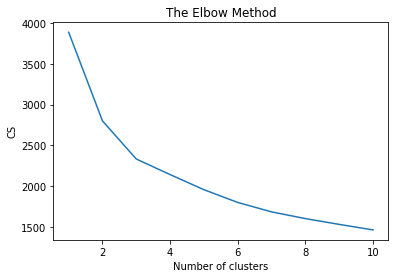

In [52]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

•  By the above plot, we can see that there is a kink at k=2 and k=3.

•  Hence k=2 can be considered a good number of the cluster to cluster this data.

•  But, we have seen that I have achieved a weak classification accuracy of 0.3% with k=2.

We achieved a weak classification accuracy of 0,3% with k=2 by our unsupervised model. So, we changed the value of k in order to find a higher classification accuracy.

In [53]:
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.4f}'. format(correct_labels/float(y.size)))

Result: 94 out of 27769 samples were correctly labeled.
Accuracy score: 0.0034


In [54]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.4f}'. format(correct_labels/float(y.size)))

Result: 94 out of 27769 samples were correctly labeled.
Accuracy score: 0.0034


By changing the value of K, we achieved the same accuracy with k=5 . We conclude that both k=2 and k=3 is the optimal number of clusters.

## Hierarchical Clustering: Agglomerative Clustering Algorithm

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

#### Agglomerative Clustering
This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy

In [55]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')
y_hc = hc.fit_predict(df)
y_hc

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

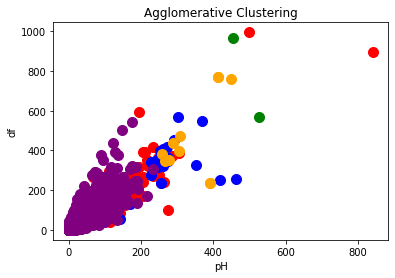

In [56]:
X = df.iloc[:, [3,4]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label ='Cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label ='Cluster 5')
plt.title('Agglomerative Clustering')
plt.xlabel('pH')
plt.ylabel('df')
plt.show()

## Machine Learning


In [57]:
X = df_train.drop(['seq_id','data_source','protein_sequence','tm'], axis=1)
y = df_train['tm']

In [58]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)
X

pH   A   C   D   E   F   G   H   I   K  ...  stability_analysis  \
0      7.0  45   1  13  30  13  38   3  14  16  ...           28.389736   
1      7.0  28   0  10  52   6  18   4  13  19  ...           65.108392   
2      7.0  50   9  27  32  21  65  11  16  39  ...           35.089336   
3      7.0  20   5  19  29  12  16   7  10  17  ...           50.502264   
4      7.0  86  14  78  78  32  84  40  71  68  ...           45.668808   
...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...                 ...   
31385  7.0  33  12  38  31  18  51  15  21  32  ...           48.604026   
31386  7.0  37   5  21  29  22  27  22  30  20  ...           35.285096   
31387  7.0  13   1   7   7   7  11   2   6   8  ...           44.198437   
31388  7.0  47   5  34  36  23  52  11  34  35  ...           36.618398   
31389  7.0  34   5  15  32  26  24  21  31  18  ...           43.210838   

       aromaticity_analysis  isoelectric_analysis  charge_analysis  \
0                  0.058651              6.109589        -2.963121   
1                  0.041958              5.144349       -13.887093   
2                  0.080483              9.032101         9.030381   
3                  0.071698              4.683840       -22.306830   
4                  0.065472              5.917928       -27.728413   
...                     ...                   ...              ...   
31385              0.089253              8.466327         2.805022   
31386              0.087420              6.532244        -6.334752   
31387              0.117188              5.271214        -3.948056   
31388              0.074199              5.688128       -11.623496   
31389              0.135940              7.139853        -2.473053   

       helix_analysis  turn_analysis  sheet_analysis  mec_analysis_1  \
0            0.316716       0.211144        0.351906           26470   
1            0.213287       0.160839        0.367133           20970   
2            0.209256       0.267606        0.213280           40340   
3            0.267925       0.215094        0.298113           22460   
4            0.271537       0.292901        0.206065          158030   
...               ...            ...             ...             ...   
31385        0.287796       0.242259        0.224044           98320   
31386        0.324094       0.217484        0.270789           48360   
31387        0.265625       0.250000        0.257812           27960   
31388        0.288364       0.268128        0.259696           43320   
31389        0.411546       0.202980        0.283054          142210   

       mec_analysis_2  gravy_analysis  
0               26470        0.148094  
1               20970       -1.089510  
2               40840       -0.710463  
3               22710       -0.507925  
4              158905       -0.400896  
...               ...             ...  
31385           99070       -0.538434  
31386           48610       -0.098934  
31387           27960       -0.332812  
31388           43570       -0.138111  
31389          142460        0.070019  

[27769 rows x 31 columns]

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 11)

In [60]:
model1 = xgb.XGBRegressor()
model1.fit(X_train, y_train)
print('Score = %.4f' %model1.score(X_train,y_train))
predictions1 = model1.predict(X_test)
mse=mean_absolute_error(y_test, predictions1)
print('Mean Absolute Error = %.2f' %mse)

Score = 0.8033
Mean Absolute Error = 5.86


In [61]:
model_KNR = KNeighborsRegressor()
model_KNR.fit(X_train, y_train)
print('Score = %.4f' %model_KNR.score(X_train,y_train))
predictions_knr = model_KNR.predict(X_test)
mse=mean_absolute_error(y_test, predictions_knr)
print('Mean Absolute Error = %.2f' %mse)

Score = 0.4983
Mean Absolute Error = 7.50


In [62]:
from sklearn import svm

model_svm = svm_model = svm.SVR()
model_svm.fit(X_train, y_train)
print('Score = %.4f' %model_svm.score(X_train,y_train))
predictions_svm = model_svm.predict(X_test)
mse=mean_absolute_error(y_test, predictions_svm)
print('Mean Absolute Error = %.2f' %mse)

Score = -0.0292
Mean Absolute Error = 8.18


In [63]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(n_estimators=100)
model_rfr.fit(X_train, y_train)
print('Score = %.4f' %model_rfr.score(X_train,y_train))
predictions_rfr = model_rfr.predict(X_test)
mse=mean_absolute_error(y_test, predictions_rfr)
print('Mean Absolute Error = %.2f' %mse)

Score = 0.9387
Mean Absolute Error = 5.66


In [64]:
from sklearn.ensemble import AdaBoostRegressor
model_AB = AdaBoostRegressor()
model_AB.fit(X_train, y_train)
print('Score = %.4f' %model_AB.score(X_train,y_train))
predictions_AB = model_AB.predict(X_test)
mse=mean_absolute_error(y_test, predictions_AB)
print('Mean Absolute Error = %.2f' %mse)

Score = 0.2839
Mean Absolute Error = 7.99


In [65]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
print('Score = %.4f' %model_LR.score(X_train,y_train))
predictions_LR = model_LR.predict(X_test)
mse=mean_absolute_error(y_test, predictions_LR)
print('Mean Absolute Error = %.2f' %mse)

Score = 0.2228
Mean Absolute Error = 8.14


Considering the most promising model, it is necessary to perform a hyperparameter optimization process

In [51]:
parameters = {
    'n_estimators': [100, 200, 500],
}

rfr_model = RandomForestRegressor()
rfr_opt = GridSearchCV(rfr_model,
                        parameters, verbose=1)

rfr_opt.fit(X_train,
         y_train)

print(rfr_opt.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'n_estimators': 500}


In [66]:
rfr_opt = RandomForestRegressor(n_estimators=500)
rfr_opt.fit(X_train, y_train)
print('Score = %.4f' %rfr_opt.score(X_train,y_train))

Score = 0.9408


In [67]:
predictions_rfr_opt = rfr_opt.predict(X_test)
mse=mean_absolute_error(y_test, predictions_rfr_opt)
print('Mean Absolute Error = %.2f' %mse)

Mean Absolute Error = 5.65


# Deep Learning

## ANN Model

In [68]:
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=31, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 5, verbose=1)


Epoch 1/5
1111/1111 [==============================] - 4s 2ms/step - loss: 1530.5801
Epoch 2/5
1111/1111 [==============================] - 2s 2ms/step - loss: 1377.9603
Epoch 3/5
1111/1111 [==============================] - 2s 2ms/step - loss: 1271.5693
Epoch 4/5
1111/1111 [==============================] - 2s 2ms/step - loss: 1079.1874
Epoch 5/5
1111/1111 [==============================] - 2s 2ms/step - loss: 710.2141


In [69]:
# metrics
pred = model.predict(X_test)
trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error = %.2f' %mean_absolute_error(y_train, trainpreds)) # train
print('Mean Absolute Error = %.2f' %mean_absolute_error(y_test, pred)) # test

695/695 [==============================] - 1s 2ms/step
Mean Absolute Error = 15.41
Mean Absolute Error = 15.48


In [70]:
# Function to generate Deep ANN model
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense

    model = Sequential()
    model.add(Dense(units=5, input_dim=31, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }
RegModel=KerasRegressor(make_regression_ann, verbose=0)

ANN_OPT=GridSearchCV(estimator=RegModel,
                         param_grid=Parameter_Trials,
                         scoring='neg_mean_absolute_error',
                         cv=5)

# Running Grid Search for different paramenters
ANN_OPT.fit(X,y, verbose=0)

print('### Printing Best parameters ###')
ANN_OPT.best_params_

C:\Users\maryg\AppData\Local\Temp\ipykernel_19800\3990422195.py:20: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



### Printing Best parameters ###


{'Optimizer_trial': 'adam', 'batch_size': 10, 'epochs': 20}

In [71]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 20, verbose=0)

# metrics
pred = model.predict(X_test)
trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error = %.2f' %mean_absolute_error(y_train, trainpreds)) # train
print('Mean Absolute Error = %.2f' %mean_absolute_error(y_test, pred)) # test

695/695 [==============================] - 1s 2ms/step
Mean Absolute Error = 8.44
Mean Absolute Error = 8.34


# DEEP LEARNING MODELS NOT WORKING

## Perceptron Model de Rosenblatt

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Input

model_preceptron = Sequential()

model_preceptron.add(Input(shape=(31,),batch_size=20))
model_preceptron.add(Dense(units=1))
model_preceptron.compile(loss="mean_squared_error", optimizer="Adam")
model_preceptron.fit(X_train, y_train, batch_size=20, epochs=5, verbose=1)

Epoch 1/5
1103/1111 [============================>.] - ETA: 0s - loss: 102575496.0000

InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/mean_squared_error/mul_1' defined at (most recent call last):
    File "C:\Users\maryg\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\maryg\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\maryg\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "C:\Users\maryg\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "C:\Users\maryg\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel\kernelbase.py", line 473, in dispatch_queue
      await self.process_one()
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel\kernelbase.py", line 462, in process_one
      await dispatch(*args)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel\kernelbase.py", line 369, in dispatch_shell
      await result
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel\kernelbase.py", line 664, in execute_request
      reply_content = await reply_content
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel\ipkernel.py", line 355, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2854, in run_cell
      result = self._run_cell(
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2900, in _run_cell
      return runner(coro)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3098, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3301, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3361, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\maryg\AppData\Local\Temp\ipykernel_19800\819677460.py", line 9, in <cell line: 9>
      model_preceptron.fit(X_train, y_train, batch_size=20, epochs=5, verbose=1)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\keras\engine\training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 526, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "c:\users\maryg\pycharmprojects\pythonproject\venv\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 259, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/mean_squared_error/mul_1'
Incompatible shapes: [20,1] vs. [15,1]
	 [[{{node gradient_tape/mean_squared_error/mul_1}}]] [Op:__inference_train_function_4224749]

## CNN Model (VGG-16)

In [73]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import MaxPool2D

model_cnn = Sequential()
model_cnn.add(Conv2D(input_dim=(31,), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_cnn.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_cnn.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_cnn.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_cnn.add(Dense(units=4096, activation="relu"))
model_cnn.add(Dense(units=4096, activation="relu"))
model_cnn.add(Dense(units=1, activation="linear"))
model_cnn.compile(loss='mean_squared_error', optimizer='adam')

TypeError: Dimension value must be integer or None or have an __index__ method, got value '(31,)' with type '<class 'tuple'>'

In [ ]:
# Function to generate CNN model
def make_regression_cnn(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Conv2D
    from keras.layers import Dense
    from keras.layers import MaxPool2D

    model_cnn = Sequential()
    model_cnn.add(Conv2D(input_dim=(22,), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model_cnn.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model_cnn.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model_cnn.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model_cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model_cnn.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model_cnn.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model_cnn.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model_cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model_cnn.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model_cnn.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model_cnn.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model_cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model_cnn.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model_cnn.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model_cnn.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model_cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model_cnn.add(Dense(units=4096, activation="relu"))
    model_cnn.add(Dense(units=4096, activation="relu"))
    model_cnn.add(Dense(units=1, activation="linear"))
    model_cnn.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model_cnn

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20,],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }
RegModel=KerasRegressor(make_regression_cnn, verbose=0)

CNN_OPT=GridSearchCV(estimator=RegModel,
                         param_grid=Parameter_Trials,
                         scoring='neg_mean_absolute_error',
                         cv=5)

# Running Grid Search for different paramenters
CNN_OPT.fit(X,y, verbose=1)

print('### Printing Best parameters ###')
CNN_OPT.best_params_

In [ ]:
# Fitting the ANN to the Training set
model_cnn.fit(X_train, y_train ,batch_size = 30, epochs = 10, verbose=0)

# metrics
pred = model_cnn.predict(X_test)
trainpreds = model_cnn.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test